In [1]:
import os
import pandas as pd

# Đường dẫn tới thư mục chứa ảnh (đã giải nén)
data_dir_1 = "/kaggle/input/bigearthnet-12band-10m/content/bigearthnet_12band_10m"
data_dir_2 = "/kaggle/input/bigearthnet-12band-10m-1/content/bigearthnet_12band_10m_1"
# Đường dẫn đến file metadata.parquet đã giải nén
parquet_path = '/kaggle/input/bigearthnetv2-reference-maps/metadata.parquet'

# Đọc file parquet
df = pd.read_parquet(parquet_path)

print(df.columns)

Index(['patch_id', 'labels', 'split', 'country', 's1_name', 's2v1_name',
       'contains_seasonal_snow', 'contains_cloud_or_shadow'],
      dtype='object')


In [2]:
dir1 = "/kaggle/input/bigearthnet-12band-10m/content/bigearthnet_12band_10m"
dir2 = "/kaggle/input/bigearthnet-12band-10m-1/content/bigearthnet_12band_10m_1"

# Lấy tên các class (tên thư mục con) từ cả 2 thư mục
classes_1 = set(os.listdir(dir1))
classes_2 = set(os.listdir(dir2))

all_classes = sorted(classes_1.union(classes_2))


print("Tổng số class:", len(all_classes))
print("Danh sách class:")
for c in all_classes:
    print(c)

Tổng số class: 20
Danh sách class:
S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP
S2A_MSIL2A_20170613T101031_N9999_R022_T34VER
S2A_MSIL2A_20170617T113321_N9999_R080_T29UPU
S2A_MSIL2A_20170701T093031_N9999_R136_T35VPK
S2A_MSIL2A_20170704T112111_N9999_R037_T29SND
S2A_MSIL2A_20170717T113321_N9999_R080_T29UPA
S2A_MSIL2A_20170717T113321_N9999_R080_T29UPV
S2A_MSIL2A_20170720T100031_N9999_R122_T34UDG
S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR
S2A_MSIL2A_20170813T112121_N9999_R037_T29SNC
S2A_MSIL2A_20170818T103021_N9999_R108_T32TMT
S2A_MSIL2A_20170905T095031_N9999_R079_T35VNL
S2A_MSIL2A_20170905T095031_N9999_R079_T35WPN
S2A_MSIL2A_20171002T094031_N9999_R036_T34TCR
S2A_MSIL2A_20171002T094031_N9999_R036_T34TCS
S2A_MSIL2A_20171002T112111_N9999_R037_T29SNB
S2A_MSIL2A_20171002T112111_N9999_R037_T29SNC
S2A_MSIL2A_20171015T095031_N9999_R079_T33UXP
S2A_MSIL2A_20171101T094131_N9999_R036_T35VNJ
S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK


In [3]:
df["labels"][15]

array(['Arable land', 'Broad-leaved forest', 'Inland waters', 'Pastures',
       'Urban fabric'], dtype=object)

In [4]:
from collections import Counter
from itertools import chain

# Chuỗi các nhãn được gộp thành 1 danh sách lớn (flattened list)
all_labels = list(chain.from_iterable(df['labels']))

# Đếm tần suất xuất hiện của từng nhãn
label_counts = Counter(all_labels)

# In ra số nhãn duy nhất
print("Số lượng nhãn duy nhất:", len(label_counts))

# In ra danh sách và số lần xuất hiện
print("\nTần suất xuất hiện của từng nhãn:")
for label, count in label_counts.most_common():
    print(f"{label:40s}: {count}")

Số lượng nhãn duy nhất: 19

Tần suất xuất hiện của từng nhãn:
Arable land                             : 188025
Mixed forest                            : 165780
Coniferous forest                       : 154941
Transitional woodland, shrub            : 141150
Broad-leaved forest                     : 135928
Land principally occupied by agriculture, with significant areas of natural vegetation: 122709
Complex cultivation patterns            : 99598
Pastures                                : 95605
Urban fabric                            : 63758
Inland waters                           : 63212
Marine waters                           : 61832
Agro-forestry areas                     : 33181
Permanent crops                         : 29588
Inland wetlands                         : 20919
Moors, heathland and sclerophyllous vegetation: 13894
Natural grassland and sparsely vegetated areas: 11882
Industrial or commercial units          : 11142
Coastal wetlands                        : 1397
Beaches, du

In [5]:
import pandas as pd
import numpy as np

# Đọc file metadata.parquet
parquet_path = '/kaggle/input/bigearthnetv2-reference-maps/metadata.parquet'
df = pd.read_parquet(parquet_path)

# Danh sách 19 lớp chuẩn
class_list = [
    'Arable land',
    'Mixed forest',
    'Coniferous forest',
    'Transitional woodland, shrub',
    'Broad-leaved forest',
    'Land principally occupied by agriculture, with significant areas of natural vegetation',
    'Complex cultivation patterns',
    'Pastures',
    'Urban fabric',
    'Inland waters',
    'Marine waters',
    'Agro-forestry areas',
    'Permanent crops',
    'Inland wetlands',
    'Moors, heathland and sclerophyllous vegetation',
    'Natural grassland and sparsely vegetated areas',
    'Industrial or commercial units',
    'Coastal wetlands',
    'Beaches, dunes, sands'
]

# Tạo ánh xạ từ tên nhãn sang chỉ số
label_to_idx = {label: i for i, label in enumerate(class_list)}

# Hàm chuyển danh sách nhãn thành vector 19 chiều
def encode_labels(label_list):
    vec = np.zeros(len(class_list), dtype=int)
    for label in label_list:
        if label in label_to_idx:
            vec[label_to_idx[label]] = 1
    return vec.tolist()

# Ghi đè cột 'labels' bằng vector 19 chiều (multi-hot)
df['labels'] = df['labels'].apply(encode_labels)

# Kiểm tra kết quả
print(df.head())

# (Tùy chọn) Lưu lại file parquet hoặc CSV
df.to_parquet('metadata_multilabel_encoded.parquet')

                                            patch_id  \
0  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
1  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
2  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
3  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
4  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   

                                              labels split  country  \
0  [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...  test  Austria   
1  [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
2  [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
3  [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
4  [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   

                                        s1_name  \
0  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_26_57   
1  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_55   
2  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_56   
3  S1B_IW_GRDH_1SDV_20170612T165

In [6]:
df['labels']

0         [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
1         [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
2         [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
3         [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
4         [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
                                ...                        
480033    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480034    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480035    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480036    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480037    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: labels, Length: 480038, dtype: object

In [7]:
import os

# Danh sách thư mục chứa dataset
data_dirs = [
    "/kaggle/input/bigearthnet-12band-10m/content/bigearthnet_12band_10m",
    "/kaggle/input/bigearthnet-12band-10m-1/content/bigearthnet_12band_10m_1"
]

class_counts = {}
total_images = 0

for data_dir in data_dirs:
    for label in sorted(os.listdir(data_dir)):
        class_path = os.path.join(data_dir, label)
        if os.path.isdir(class_path):
            n_files = len([f for f in os.listdir(class_path) if f.endswith('.tif')])
            if label not in class_counts:
                class_counts[label] = 0
            class_counts[label] += n_files
            total_images += n_files

# In kết quả
print("Số lượng ảnh mỗi class (gộp cả 2 dataset):")
for label, count in class_counts.items():
    print(f"Class {label}: {count} ảnh")

print(f"\nTổng số ảnh: {total_images}")

Số lượng ảnh mỗi class (gộp cả 2 dataset):
Class S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP: 3305 ảnh
Class S2A_MSIL2A_20170613T101031_N9999_R022_T34VER: 6686 ảnh
Class S2A_MSIL2A_20170617T113321_N9999_R080_T29UPU: 7986 ảnh
Class S2A_MSIL2A_20170701T093031_N9999_R136_T35VPK: 7997 ảnh
Class S2A_MSIL2A_20170704T112111_N9999_R037_T29SND: 8216 ảnh
Class S2A_MSIL2A_20170717T113321_N9999_R080_T29UPA: 370 ảnh
Class S2A_MSIL2A_20170717T113321_N9999_R080_T29UPV: 6013 ảnh
Class S2A_MSIL2A_20170720T100031_N9999_R122_T34UDG: 1540 ảnh
Class S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR: 4864 ảnh
Class S2A_MSIL2A_20170813T112121_N9999_R037_T29SNC: 8222 ảnh
Class S2A_MSIL2A_20170818T103021_N9999_R108_T32TMT: 4888 ảnh
Class S2A_MSIL2A_20170905T095031_N9999_R079_T35VNL: 8229 ảnh
Class S2A_MSIL2A_20170905T095031_N9999_R079_T35WPN: 2292 ảnh
Class S2A_MSIL2A_20171002T094031_N9999_R036_T34TCR: 4864 ảnh
Class S2A_MSIL2A_20171002T094031_N9999_R036_T34TCS: 627 ảnh
Class S2A_MSIL2A_20171002T112111_N9999_R037_

In [8]:
df['labels']

0         [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
1         [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
2         [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
3         [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
4         [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
                                ...                        
480033    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480034    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480035    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480036    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480037    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: labels, Length: 480038, dtype: object

In [9]:
!pip install rasterio

Shape của ảnh S2A_MSIL2A_20171101T094131_N9999_R036_T35VNJ_02_07_12band.tif: (12, 120, 120) (channels, height, width)


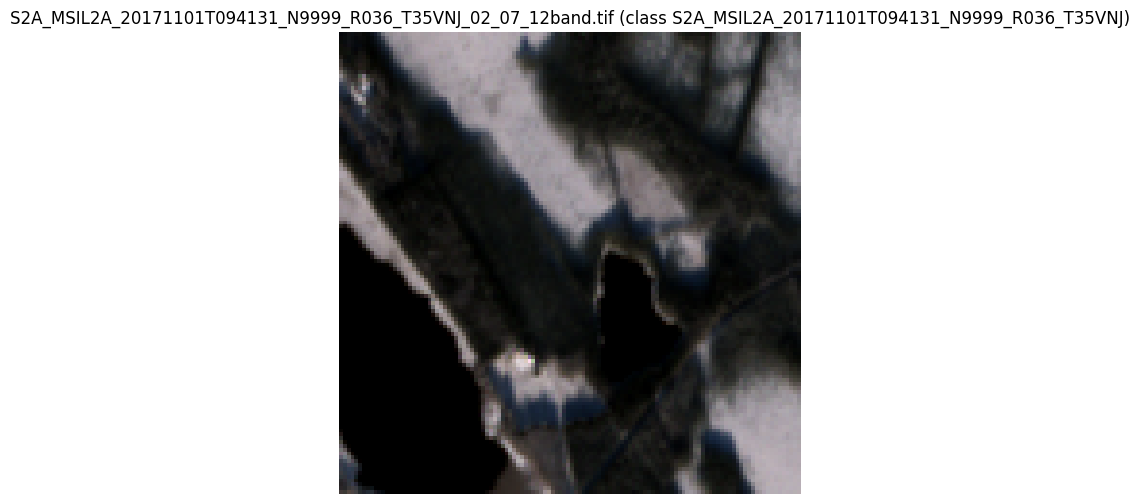

In [10]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import random

# Chọn ngẫu nhiên 1 class và 1 ảnh trong class
random_class = random.choice(os.listdir(data_dir))
img_path = os.path.join(data_dir, random_class)
random_img = random.choice([f for f in os.listdir(img_path) if f.endswith('.tif')])
img_full_path = os.path.join(img_path, random_img)

# Đọc ảnh
with rasterio.open(img_full_path) as src:
    img = src.read()  # shape: (12, H, W)

# In shape
print(f"Shape của ảnh {random_img}: {img.shape} (channels, height, width)")

# Hiển thị ảnh (dùng band 4,3,2 tương ứng RGB)
rgb = np.stack([img[3], img[2], img[1]], axis=-1)  # Chú ý chỉ số bắt đầu từ 0
rgb = rgb.astype(np.float32)
rgb /= np.max(rgb) + 1e-6  # Chuẩn hóa để hiển thị

plt.figure(figsize=(6, 6))
plt.imshow(rgb)
plt.title(f"{random_img} (class {random_class})")
plt.axis('off')
plt.show()

In [11]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from glob import glob

# 1. Danh sách thư mục chứa ảnh
IMAGE_DIRS = [
    "/kaggle/input/bigearthnet-12band-10m/content/bigearthnet_12band_10m",
    "/kaggle/input/bigearthnet-12band-10m-1/content/bigearthnet_12band_10m_1"
]


# 2. Đọc metadata chứa patch_id và labels
# df = pd.read_parquet('/kaggle/input/bigearthnetv2-reference-maps/metadata.parquet')

# 3. Gộp toàn bộ ảnh từ nhiều thư mục
tif_paths = []
for image_dir in IMAGE_DIRS:
    tif_paths.extend(glob(os.path.join(image_dir, "*", "*_12band.tif")))

# 4. Tạo ánh xạ patch_id → đường dẫn ảnh
patch_to_path = {
    os.path.basename(path).replace("_12band.tif", ""): path
    for path in tif_paths
}

# 5. Giữ lại các patch_id có ảnh thật sự
df = df[df['patch_id'].isin(patch_to_path)]

# 6. Gán cột image_path theo ánh xạ tìm được
df['image_path'] = df['patch_id'].map(patch_to_path)

# 7. Chia ngẫu nhiên train/val/test (70/15/15)
train_val_df, test_df = train_test_split(df, test_size=0.15, random_state=42, shuffle=True)
train_df, val_df = train_test_split(train_val_df, test_size=0.1765, random_state=42)

# 8. Tạo danh sách (image_path, labels)
train_list = list(zip(train_df['image_path'], train_df['labels']))
val_list = list(zip(val_df['image_path'], val_df['labels']))
test_list = list(zip(test_df['image_path'], test_df['labels']))

# 9. In kết quả
print(f"Số ảnh train: {len(train_list)}")
print(f"Số ảnh val:   {len(val_list)}")
print(f"Số ảnh test:  {len(test_list)}")

Số ảnh train: 71741
Số ảnh val:   15377
Số ảnh test:  15374


In [12]:
len(tif_paths)

112210

In [13]:
train_list[0]

('/kaggle/input/bigearthnet-12band-10m/content/bigearthnet_12band_10m/S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR/S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR_64_29_12band.tif',
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
# Kiểm tra những ảnh KHÔNG có trong metadata
tif_patch_ids = set([os.path.basename(p).replace('_12band.tif', '') for p in tif_paths])
metadata_patch_ids = set(df['patch_id'].tolist())

missing_from_metadata = tif_patch_ids - metadata_patch_ids
print(f"Số ảnh KHÔNG có metadata: {len(missing_from_metadata)}")

Số ảnh KHÔNG có metadata: 9718


In [15]:
# Số ảnh thực sự trong thư mục
print("Tổng số file ảnh .tif:", len(tif_paths))

# Số patch_id có metadata
print("Tổng số patch_id trong metadata:", len(df))

# Số ảnh tồn tại đồng thời cả trong thư mục và metadata
common_ids = set(df['patch_id']).intersection(set(patch_to_path))
print("Số patch_id khớp được cả metadata và ảnh:", len(common_ids))

Tổng số file ảnh .tif: 112210
Tổng số patch_id trong metadata: 102492
Số patch_id khớp được cả metadata và ảnh: 102492


In [16]:
!pip install albumentations

In [17]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

train_transform = A.Compose([
    # A.Normalize(mean=[0]*12, std=[1]*12, max_pixel_value=1.0),

    # A.Resize(244, 224),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5),
    A.Normalize(mean=0.0, std=1.0, max_pixel_value=1.0),
    ToTensorV2(transpose_mask=True),
])

val_transform = A.Compose([
    # A.Resize(224, 224),
    A.Normalize(mean=[0]*12, std=[1]*12, max_pixel_value=1.0),
    ToTensorV2(transpose_mask=False)
])

/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
/usr/local/lib/python3.11/dist-packages/albumentations/augmentations/pixel/transforms.py:228: RuntimeWarning: divide by zero encountered in reciprocal
  self.denominator = np.reciprocal(


In [18]:
from torch.utils.data import Dataset
import torch
import numpy as np
import rasterio  # dùng rasterio chứ không cần tifffile nếu bạn dùng .open()

class BigEarthNetDataset(Dataset):
    def __init__(self, data_list, transform=None):
        self.data_list = data_list  # List of (img_path, label_list)
        self.transform = transform

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        img_path, label = self.data_list[idx]
    
        with rasterio.open(img_path) as src:
            image = src.read()  # (13, H, W)
    
        image = image.astype(np.float32) / 10000.0
        image = np.transpose(image, (1, 2, 0))  # (H, W, C)
    
        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
        else:
            image = torch.tensor(np.transpose(image, (2, 0, 1)), dtype=torch.float32)
    
        # Chuyển label thành Tensor float cho multi-label
        label = torch.tensor(label, dtype=torch.float32)
    
        return image, label

In [19]:
from torch.utils.data import DataLoader

# Batch size
BATCH_SIZE = 64

# Dataset
train_dataset = BigEarthNetDataset(train_list, transform=train_transform)
val_dataset = BigEarthNetDataset(val_list, transform=val_transform)
test_dataset = BigEarthNetDataset(test_list, transform=val_transform)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=8, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Label Tensor: tensor([1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0.])
Shape: torch.Size([19])
Non-zero class indices: [0, 4, 7, 11]
Non-zero class count: 4.0


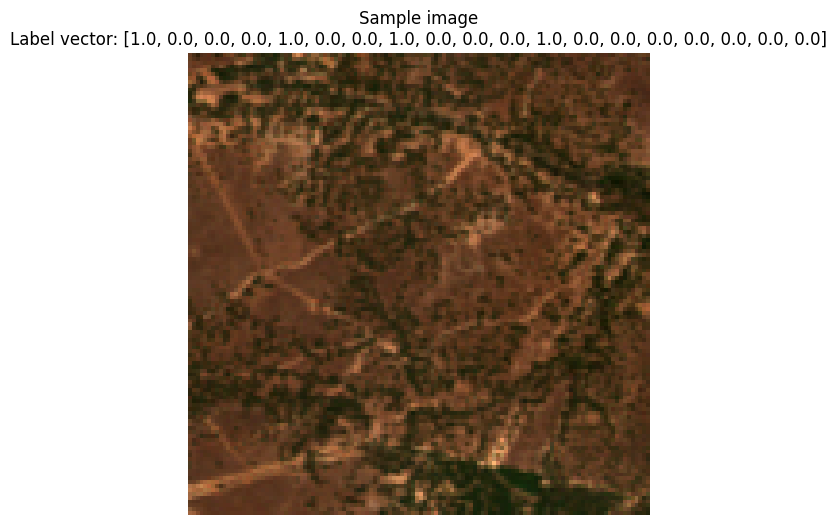

In [20]:
# Lấy 1 mẫu bất kỳ từ train_dataset
sample_img, sample_label = train_dataset[1]

#Kiểm tra thông tin label
print("Label Tensor:", sample_label)
print("Shape:", sample_label.shape)
print("Non-zero class indices:", torch.nonzero(sample_label).squeeze().tolist())
print("Non-zero class count:", torch.sum(sample_label).item())

# Chuyển tensor về numpy để hiển thị
sample_img_np = sample_img.numpy().transpose(1, 2, 0)  # (H, W, C)

# Lấy lại các band RGB (band 4, 3, 2 --> index 3, 2, 1)
rgb = sample_img_np[:, :, [3, 2, 1]]

# Chuẩn hóa về [0, 1] nếu cần (nếu bạn đã normalize thì giá trị có thể lệch)
rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min() + 1e-6)

# Hiển thị ảnh
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.imshow(rgb)
plt.title(f"Sample image\nLabel vector: {sample_label.tolist()}")
plt.axis("off")
plt.show()

In [21]:
pip install efficientnet_pytorch

Note: you may need to restart the kernel to use updated packages.


Using device: cuda
Model loaded and moved to cuda
True Labels (binary vector):
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Logits:
 [ -6.13598   1.93076   4.6547   -1.51075  -4.24082  -4.59874 -16.59977
 -16.18007  -7.63328  10.28153 -14.44959 -19.48014 -19.11271  -5.10878
 -21.20639 -19.77558  -9.82304 -25.25109 -30.23137]
Sigmoid(Logits):
 [0.00216 0.87333 0.99057 0.18083 0.01419 0.00996 0.      0.      0.00048
 0.99997 0.      0.      0.      0.00601 0.      0.      0.00005 0.
 0.     ]
Predicted Labels:
 [0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


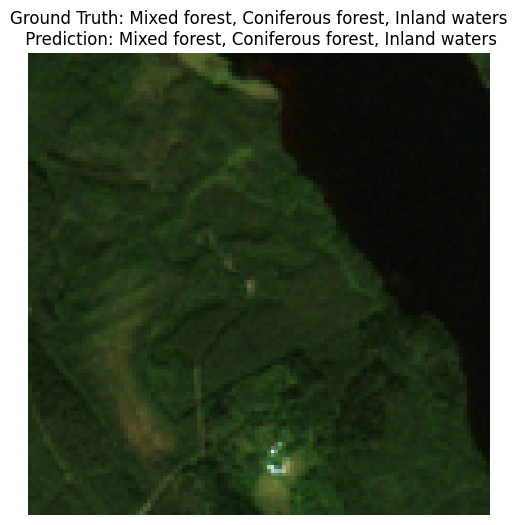

True Labels (binary vector):
 [1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Logits:
 [  3.74621  -3.88715  -6.11593  -4.7173   -1.31924   0.30539  -0.26691
  -4.84785   1.75883  -7.70922 -17.90087  -8.65007   3.14445  -9.28509
  -5.85768  -5.20154  -4.09657 -11.12493 -18.5099 ]
Sigmoid(Logits):
 [0.97694 0.02009 0.0022  0.00886 0.21094 0.57576 0.43366 0.00778 0.85306
 0.00045 0.      0.00018 0.95869 0.00009 0.00285 0.00548 0.01636 0.00001
 0.     ]
Predicted Labels:
 [1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0]


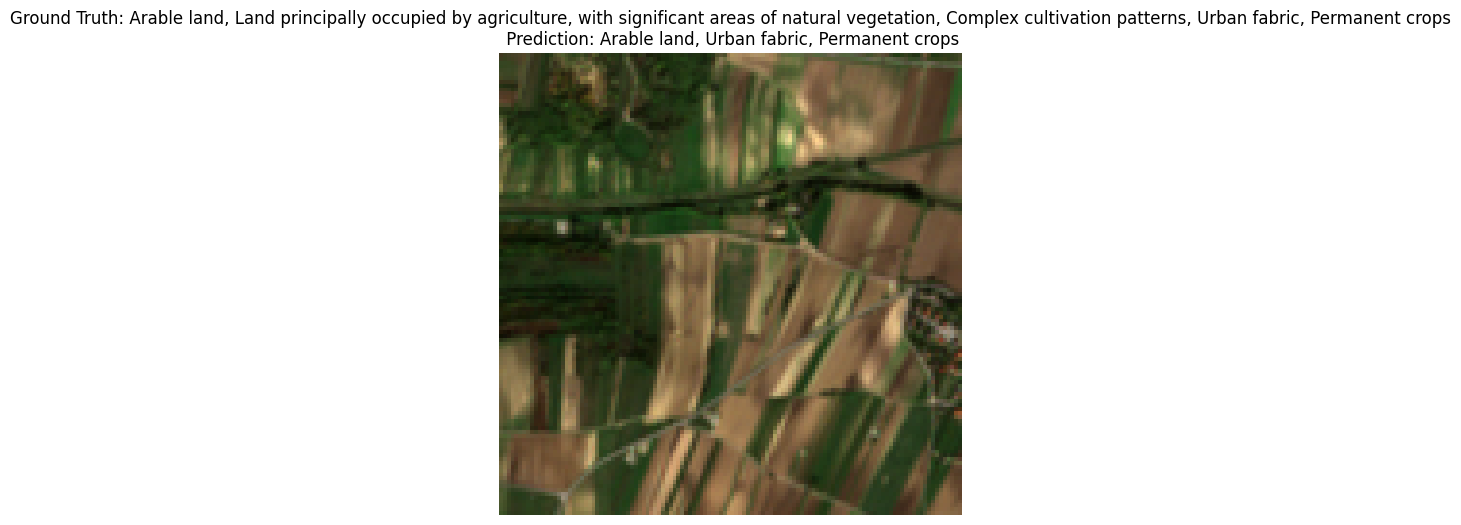

True Labels (binary vector):
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Logits:
 [ -3.87071   1.40487   3.63827  -0.23246  -4.12358  -3.44173 -10.95889
 -10.43065  -7.15894  -4.27236  -9.86176 -12.8637  -12.95962  -2.15042
 -12.84928 -12.59453  -8.84929 -11.7576  -16.64425]
Sigmoid(Logits):
 [0.02042 0.80296 0.97438 0.44215 0.01593 0.03102 0.00002 0.00003 0.00078
 0.01376 0.00005 0.      0.      0.10429 0.      0.      0.00014 0.00001
 0.     ]
Predicted Labels:
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


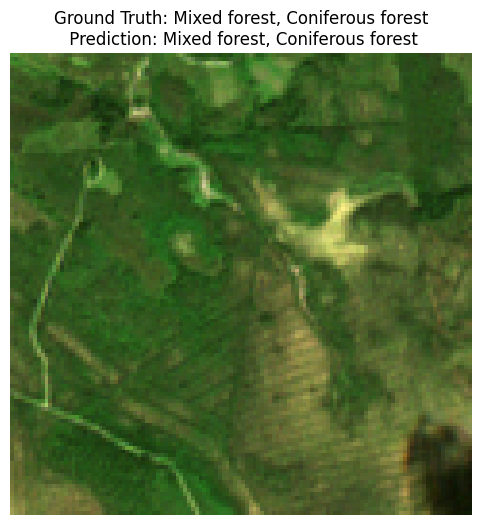

True Labels (binary vector):
 [1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Logits:
 [  5.46972  -4.0657   -6.83744  -4.94041   2.8407    1.49727  -1.78793
  -2.01817   4.8878   -4.4499  -17.61028 -16.53     -2.33725  -6.19721
 -10.96272  -6.54747  -4.85928 -15.56539 -25.71867]
Sigmoid(Logits):
 [0.99581 0.01686 0.00107 0.0071  0.94484 0.81717 0.14333 0.11731 0.99252
 0.01154 0.      0.      0.08808 0.00203 0.00002 0.00143 0.0077  0.
 0.     ]
Predicted Labels:
 [1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0]


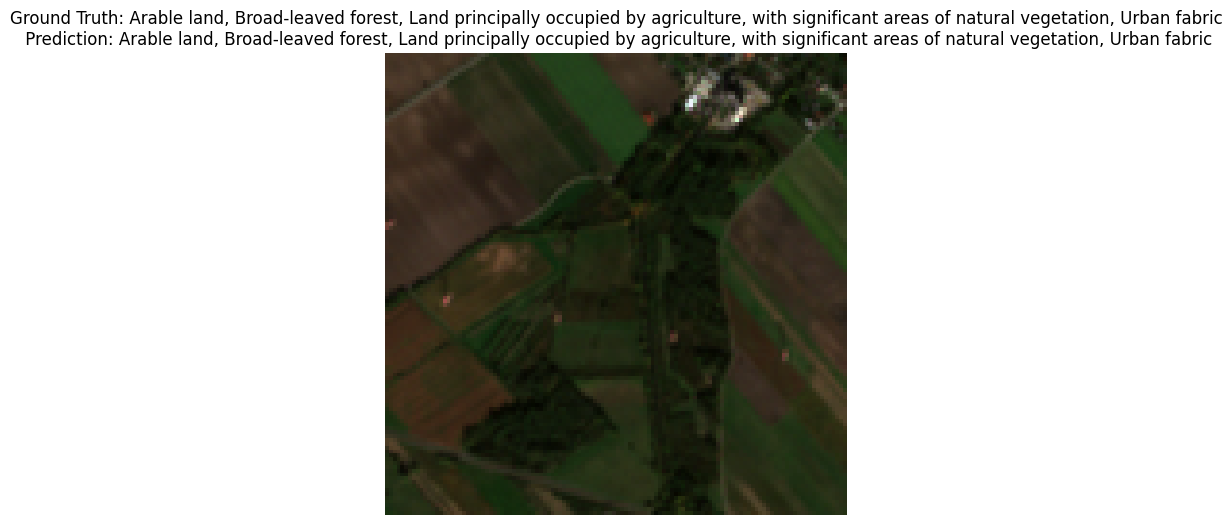

True Labels (binary vector):
 [1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Logits:
 [  1.52428   1.27302  -3.76491  -3.58715   3.04384  -0.50713  -0.59068
  -0.50822  -1.81575  -6.80415 -20.08028 -12.7769   -2.85797  -7.26099
  -7.38192  -5.42055  -6.88317 -18.36876 -24.33791]
Sigmoid(Logits):
 [0.82117 0.78126 0.02264 0.02693 0.95452 0.37587 0.35648 0.37561 0.13994
 0.00111 0.      0.      0.05427 0.0007  0.00062 0.00441 0.00102 0.
 0.     ]
Predicted Labels:
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


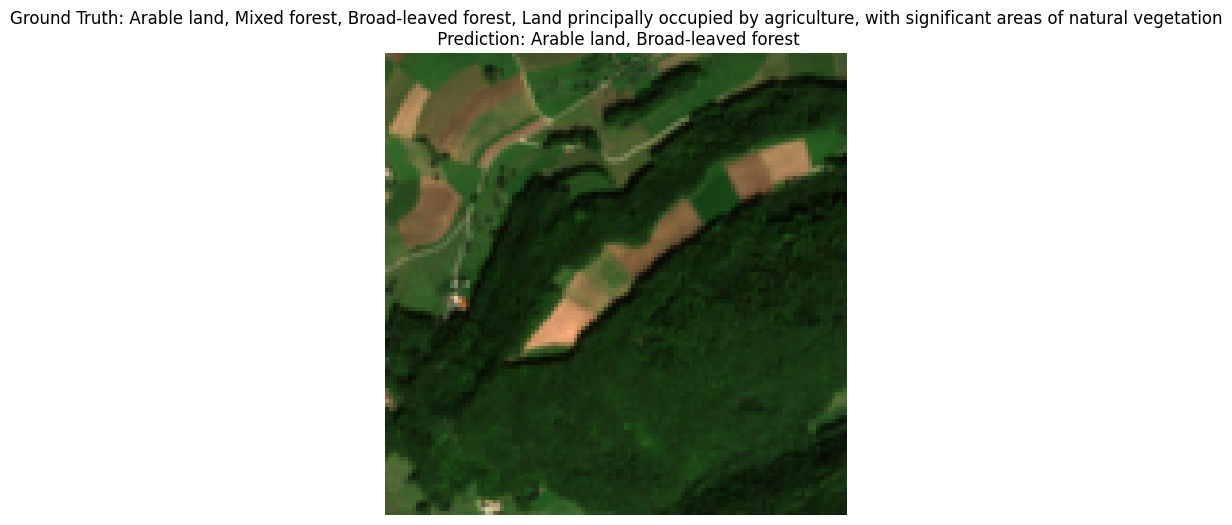

In [22]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import random

# Luôn dùng CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Load model EfficientNet đã huấn luyện (trên CPU)
model_path = "/kaggle/input/efficientnet1-v3/t-capstone-process-bigearth-nhan-efficientnet-v3.pth"
model = torch.load(model_path, map_location=device, weights_only=False)
model.eval()
print("Model loaded and moved to", device)

# Danh sách class BigEarthNet
class_list = [
    'Arable land',
    'Mixed forest',
    'Coniferous forest',
    'Transitional woodland, shrub',
    'Broad-leaved forest',
    'Land principally occupied by agriculture, with significant areas of natural vegetation',
    'Complex cultivation patterns',
    'Pastures',
    'Urban fabric',
    'Inland waters',
    'Marine waters',
    'Agro-forestry areas',
    'Permanent crops',
    'Inland wetlands',
    'Moors, heathland and sclerophyllous vegetation',
    'Natural grassland and sparsely vegetated areas',
    'Industrial or commercial units',
    'Coastal wetlands',
    'Beaches, dunes, sands'
]

# Hàm hiển thị prediction
def show_sample_prediction(dataset, index):
    image, true_labels = dataset[index]
    input_tensor = image.unsqueeze(0).to(device)  # (1, C, H, W)

    np.set_printoptions(suppress=True, precision=5)
    # Dự đoán
    with torch.no_grad():
        output = model(input_tensor)
        sigmoid_probs = torch.sigmoid(output.squeeze()).cpu().numpy()
        predicted = (sigmoid_probs > 0.8).astype(int)  # Sửa chỗ này
    
    # Hiển thị ma trận nhãn gốc và predicted
    print("True Labels (binary vector):\n", true_labels.numpy())
    print("Logits:\n", output.squeeze().cpu().numpy())
    print("Sigmoid(Logits):\n", np.array2string(sigmoid_probs, precision=5, suppress_small=True))
    print("Predicted Labels:\n", predicted)
    
    # Lấy tên nhãn
    true_label_names = [class_list[i] for i, val in enumerate(true_labels) if val == 1]
    predicted_label_names = [class_list[i] for i, val in enumerate(predicted) if val == 1]

    # Hiển thị ảnh (chọn RGB bands 4,3,2)
    img_np = image.cpu().numpy().transpose(1, 2, 0)
    rgb = img_np[:, :, [3, 2, 1]]  # Bands 4,3,2
    rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min() + 1e-6)  # Scale về [0,1]

    plt.figure(figsize=(6, 6))
    plt.imshow(rgb)
    plt.axis('off')
    plt.title("Ground Truth: {}\n Prediction: {}".format(", ".join(true_label_names), ", ".join(predicted_label_names)))
    plt.show()

# Hiển thị 5 mẫu random từ test_dataset
for _ in range(5):
    idx = random.randint(0, len(test_dataset) - 1)
    show_sample_prediction(test_dataset, idx)

In [43]:
import torch
import numpy as np
from sklearn.metrics import (
    classification_report, precision_recall_fscore_support, average_precision_score
)
from sklearn.metrics import (
    classification_report, multilabel_confusion_matrix, roc_auc_score,
    precision_recall_fscore_support, average_precision_score,
    hamming_loss, accuracy_score, precision_score, recall_score,
    f1_score, jaccard_score, roc_curve, precision_recall_curve, auc
)

# Giả sử test_loader và model đã có sẵn
# Class 0 là "Arable land", tương ứng index = 0
# class_list là danh sách tên lớp theo thứ tự

def evaluate_model_mask_band8(model, dataloader, device, threshold=0.5):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in dataloader:
            # Mask toàn bộ band 8 (index 7 vì bắt đầu từ 0)
            images[:, [5,8,9], :, :] = 0.0
            
            images = images.to(device)
            labels = labels.to(device)
            outputs = torch.sigmoid(model(images))
            
            all_preds.append(outputs.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

    y_true = np.vstack(all_labels)
    y_scores = np.vstack(all_preds)
    y_pred = (y_scores >= threshold).astype(int)

    return y_true, y_scores, y_pred

# === Chạy đánh giá ===
y_true, y_scores, y_pred = evaluate_model_mask_band8(model, test_loader, device)

# === Đánh giá riêng class 0 (Arable land) ===
class_idx = 17  # class "Arable land"

# Precision, Recall, F1 cho class 0
precision_0 = precision_score(y_true[:, class_idx], y_pred[:, class_idx], zero_division=0)
recall_0 = recall_score(y_true[:, class_idx], y_pred[:, class_idx], zero_division=0)
f1_0 = f1_score(y_true[:, class_idx], y_pred[:, class_idx], zero_division=0)
support_0 = int(np.sum(y_true[:, class_idx]))

# === In kết quả ===
print(f"\nClass 17 - {class_list[class_idx]}")
print(f"Precision: {precision_0:.2f}")
print(f"Recall:    {recall_0:.2f}")
print(f"F1-Score:  {f1_0:.2f}")
print(f"Support:   {support_0}")


Class 17 - Coastal wetlands
Precision: 0.75
Recall:    0.04
F1-Score:  0.07
Support:   79
